In [ ]:
### install necessary packages ####

# %pip install -U cupy-cuda11x
# %pip install fastapi kaleido python-multipart uvicorn
# %pip install -U tensorflow-probability
# %pip install -U scipy

# %pip install -q numba==0.58.0
# %pip install -U seaborn
# %pip install --force-reinstall numpy==1.26.0

%pip install -qqq git+https://github.com/keriheuer/pyunicorn --progress-bar off

# comment out of final version (not during dev)
import os
if os.path.exists("/content/rqa"):
  !rm -rf /content/rqa

!git clone --quiet https://github.com/keriheuer/rqa > /dev/null

  Cloning https://github.com/keriheuer/pyunicorn to /tmp/pip-req-build-mfkbsaxw
  Running command git clone --filter=blob:none --quiet https://github.com/keriheuer/pyunicorn /tmp/pip-req-build-mfkbsaxw
  Resolved https://github.com/keriheuer/pyunicorn to commit aa56ad1db9b53c0cd33d41e06303293817640047
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.9 MB/s eta 0:00:00
  Created wheel for pyunicorn: filename=pyunicorn-0.7.0a1-cp310-cp310-linux_x86_64.whl size=1899052 sha256=90bf28eeb0bac05442098cd88a06c862837d024d34a22de76daf06d49ba7f1a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-w7qctc_c/wheels/8a/89/0c/8c599c90d385519ae77db4205930b60e964233c5262f624f00
Successfully built pyunicorn
  Attempting uninstall: numpy
    Found existing installati

In [2]:
# set up colab notebook

%matplotlib inline

from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import sys
sys.path.append('/content/rqa')

import rqa
w = rqa.Widget()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Intro to Recurrence Analysis

Recurrence analysis is a method of time series analysis originally developed to study repetitive, but not necessarily periodic phenomena that are not easily characterized by other techniques.

In [33]:
# TO DO:

# finish short/general description of recurrence analysis, i.e. what is a recurrence

<IPython.core.display.Javascript object>

# Recurrence Plots (RPs)

In [ ]:
# TO DO :

# add paragraph describing below plot? maybe specify explicitly they represent stochastic, periodic, quasi-periodic, chaotic, damped random walk

<IPython.core.display.Javascript object>

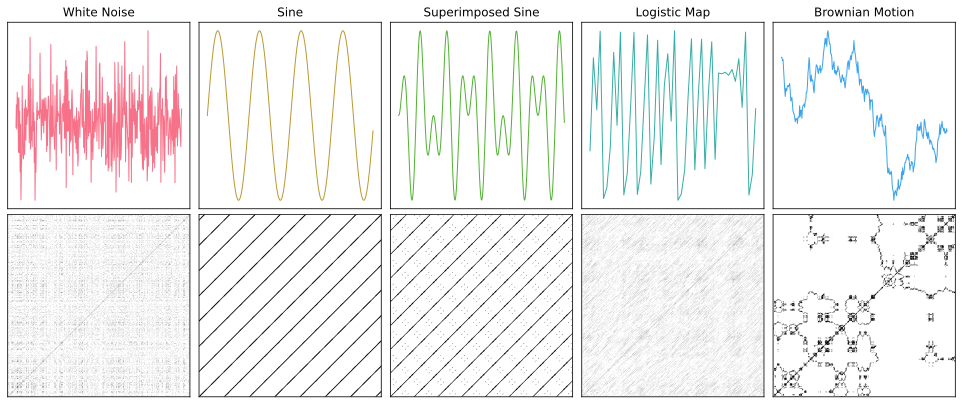

In [ ]:
w.characteristic_rps()

Can you spot RP features that are characteristic of these dynamical systems?
</br>
</br>

| <div style="width:100px">RP Features</div> | <div style="width:200px">Dynamical Behavior</div>  |
| --------------------------------------- | ------------------------------------- |
|Long diagonal lines | purely periodic motion |
|Diagonal lines of varying length | quasi-periodic motion |
|Short, chopped-up diagonal lines | chaotic motion |
|Single, isolated points | stochastic (random) motion |
|Large patches of white | disruption, possible state changes |
|Vertical lines | trapped states, slowly changing dynamics|

</br>

---
# Recurrence Quantitative Analysis (RQA)

RPs are powerful tools for visualizing recurrences in phase space, but they can also be further quantified.

Collectively known as Recurrence Quantitative Analysis (RQA), methods of measuring the number and distribution of RP features are capable of distinguishing between different types of dynamical systems. They have also been used to identify transitions in dynamical behavior.

Several important RQA metrics which can be extracted from RPs are listed below.

| <div style="width:200px">RQA</div> | <div style="width:200px">Statistic</div>  | <div style="width:300px">Definition</div> |
| --------------------------------------- | ------------------------------------- | ------------------------------------- |
|$DET$       | Determinism | Fraction of recurrent points forming diagonal structures|
|$LAM$      | Laminarity | Fraction of recurrent points forming vertical structures|
|$RR$ | Recurrence Rate | Ratio of recurrent points to total points (i.e. length of time series)|
|$ENTR$ | Shannon Entropy | How complicated the distribution of diagonal line lengths is |
|$TT$ | Trapping Time | Average vertical line length|
|$L_{max}$ | Maximum Diagonal Line Length | Longest diagonal line$^*$|
|$L_{mean}$ | Mean Diagonal Line Length | Average length of diagonal lines$^*$|
|$DIV$ | Divergence ($1/L_{max}$) | How quickly the distribution of diagonal line lengths diverges|


</br></br>
\* excluding the main diagonal (also known as the line of identity, $LOI$) \
and Theiler window (equal to the number of diagonals excluded on either side of the $LOI$)

---

## Comparing RQA metrics

Let's compare some RQA statistics for the different systems whose RPs we saw above. \
Use the dropdown menu below to select an RQA metric.

Do the quantitative metrics reflect the differences you saw in their RP features?

In [7]:
w.characteristic_rqa()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# Thresholded vs. Unthresholded RPs

The RPs above were thresholded by a recurrence rate of 5%, meaning that black dots in the RP represent pairs of points separated by a phase space distance $d ≲ \varepsilon$, where $\varepsilon$ is chosen such that the RQA metric $RR$ is 5%. In other words, we pick a value for $\varepsilon$ such that only 0.05 of the total number of points are considered a recurrence.

What happens when we look at distances in phase space over a range of recurrence rates? If we let $d = \varepsilon$, the RP is unthresholded and  represents the distance matrix rather than the recurrence matrix. A dot is now colored by the distance between a pair of points in phase space, which allows us to visualize the RP as we increase the threshold $\varepsilon$ from 0 to the maximum distance between any pair of points.

In the below example, dark areas (purple) represent points in the phase space trajectory that are nearby each other, while light areas (yellow) represent pairs of points which would not be considered a recurrence even if we choose the largest possible value for $\varepsilon$. Plotting the distance matrix is therefore a powerful way to visualize how similar or distinct different portions of a time series are.

<IPython.core.display.Javascript object>

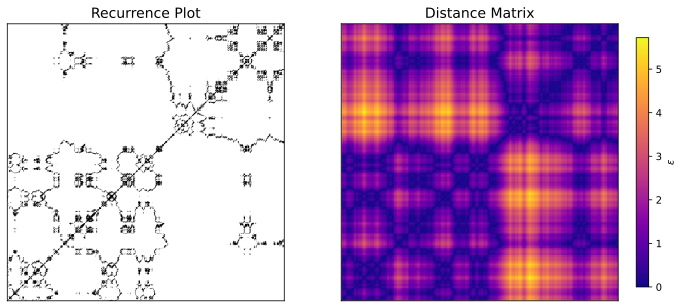

In [35]:
## TO DO: ADD PLOT CODE TO _PLOTTING FILE ON GITHUB

def rp_thresholding():
  import matplotlib.pyplot as plt, numpy as np

  fig, ax = plt.subplots(ncols=2, figsize=(13,5)) #, width_ratios=[10, 10, 1])
  thresh_rp = np.load("/content/rqa/data/example_rps/brownian_rp.npy")
  unthresh_rp = np.load("/content/rqa/data/example_rps/brownian_dist.npy")
  ax[0].imshow(thresh_rp, origin='lower', cmap='Greys', interpolation='none')
  sc = ax[1].imshow(unthresh_rp, origin='lower', cmap='plasma', interpolation='none')

  for axis in (ax[0], ax[1]):
    # axis.set_xlabel('Time (arb. units)', fontsize=14)
    # axis.set_ylabel('Time (arb. units)', fontsize=14)
    axis.tick_params(which="both", axis="both", top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=False, labeltop=False, labelright=False)
    axis.label_outer()

  fig.colorbar(sc, label=r'$\epsilon$', ax=ax[1], shrink=0.9)
  ax[0].set_title('Recurrence Plot', fontsize=14)
  ax[1].set_title('Distance Matrix', fontsize=14)
  fig.subplots_adjust(wspace=0.01)
  fig.show()

rp_thresholding()

If we look at the colors of different features in the thresholded RP (left), we can see how recurrences and non-recurrences correspond to small and large distances in phase space, respectively. Block-like patterns in the thresholded RP are plotted in darker colors on the right, meaning points are very close in phase space. Large white patches, on the other hand, are plotted in brighter colors, representing regions of phase space which are far away from each other.

So in physical terms, we can understand recurrences (small distances in phase space) as repetitive features of the light curves and non-recurrences as states that are distinct and/or far from normal.

# Constructing RPs from 1D time series

So how exactly do we go from time series data to RPs? For a multi-dimensional time series, the distance between points in any 2 dimensions can be calculated. For a 1-dimensional time series, Takens' time delay theorem says we can reconstruct phase space by comparing the original signal to a delayed version of itself. This process creates a higher-dimensional embedding of the signal while preserving all information about the underlying system dynamics.

Reconstructing phase space involves two important parameters: a time delay $\tau$ and embedding dimension $m$. **FINISH**

In [37]:
## include little graphic illustrating??

<IPython.core.display.Javascript object>

---

# Exercise: Exploring RP Features

Use the dropdown menu and sliders to generate different time series and observe how the RP changes visually.

Do the number and thickness of diagonal or vertical lines change with different parameters of the system (i.e. frequency, amplitude)?

Are certain patterns/features of the RP the same for a system even when the time series varies?

To see what the RP looks like when we threshold it by a recurrence rate of 35%, toggle the button above the plot.

Remember, the threshold is the max (threshold) phase space distance $\varepsilon$ between a pair of points which are considered a recurrence. So thresholding by RR = 35% means we pick $\varepsilon$ such that only 0.35 of the total number of points in the time series are recurrences.

In [4]:
w.generate_rps()


# TO DO:
# try adding empty axes on top and right of bqplot figures
# reset bqplot font to sans-serif to keep consistency w/ ipywidgets
# see if axis tick size can be increased
# double check if phi is implemented for sine/cosine funcs
# maybe restrict range of logistic map parameters more to zoom in
# see if bqplot colorbar ticks can be diff color (black) than main plot

<IPython.core.display.Javascript object>

# Exercise: Varying RQA Parameters

Now let's look at how changing different parameters used in recurrence analysis (e.g., embedding parameters) affect the RP you constructed above and its RQA metrics.

Use the sliders and toggle buttons to vary parameters. A few things to note:
- By definition, the distance matrix will be the same regardless of the RR value and whether it's local vs. global as the RR parameter only affects the thresholded RP.
- To see the Theiler window which is excluded from RQA calculations (i.e. toggling the button), make sure the 'Threshold RP' button is toggled on. The Theiler window is only used for RQA and not calculating phase space distances, so it is not overplotted on the distance matrix. By default, the Theiler window is set to 1 in order to exclude the main diagonal.
- Changing the distance metric (i.e. what distance is calculated in phase space) will only be noticeable in the RP visually and in the RQA metrics when the time series is embedded (time delay and dimension $\neq$ 1).

In [32]:
w.vary_rqa_params()

## TO DO:
# fix left side cut off
# remove show LMAX and VMAX buttons
# pre-populate RQA stats output
# fix y axis label of RP

<IPython.core.display.Javascript object>

# Dynamical transitions revealed by RPs

What happens when the dominant dynamics of a system change over time, such as from stochastic to periodic or from periodic to quasi-periodic? When the dynamics producing the observed signal change, so do the features characterizing that signal. Different features of the signal at different times can be understood as corresponding to distinct states of the system and would easily be seen in the RP. Indeed, recurrence analysis has been successfully used to detect dynamical transitions within the same system ________ [include refs?].

In the astrophysics literature, there is a class of accreting supermassive black holes which appear to have been observed in different states. These rare "changing-look" objects exhibit extreme variability over a wide range of timescales. One might then expect these changes to be reflected in their RPs.

Now that you have seen a few RPs from different types of stationary systems, let's see what the RP of a non-stationary system could look like. We'll simulate some dynamical changes by splicing together multiple time series and examine how that RP looks like in comparison to the ones we looked at above.

In [ ]:
### left side will be some drop down menus similar to the "superimposed" option from "Generate RPs"
### where you can choose signal 1, signal 2, signal 3

### will show the spliced together light curve color-coded by signal 1/2/3 and the RP
### maybe have a toggle button to outline the RP windows corresponding to signal 1 vs. 2 vs. 3?